In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [154]:
data=pd.read_csv(r"C:\Users\PRASAD\OneDrive\Documents\PNQ_AQI.csv")
data.sample(5)
data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7844 entries, 0 to 7843
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        7844 non-null   object 
 1   SO2 µg/m3   7844 non-null   object 
 2   Nox µg/m3   7844 non-null   object 
 3   RSPM µg/m3  7843 non-null   float64
 4   SPM         2970 non-null   float64
 5   CO2 µg/m3   0 non-null      float64
 6   AQI         7787 non-null   float64
 7   Location    7844 non-null   object 
dtypes: float64(4), object(4)
memory usage: 490.4+ KB


In [155]:
data.isnull().sum()
data.sample(5)

,Date,SO2 µg/m3,Nox µg/m3,RSPM µg/m3,SPM,CO2 µg/m3,AQI,Location
7570,26-05-2018,39,35,53.0,NaN,NaN,53.0,MPCB-PMPR
1807,23-02-2011,28,31,112.0,297.0,NaN,108.0,MPCB-BSRI
761,26-05-2011,4,BDL - NA,97.0,NaN,NaN,97.0,MPCB-KR
3184,14/03/2014,28,45,151.0,288.0,NaN,134.0,Nal Stop
7287,2019-01-01 00:00:00,15,84,203.0,NaN,NaN,169.0,MPCB-KR


In [156]:
# Convert the 'Date' column with dayfirst=True and allow errors to be coerced
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True, errors='coerce')

# Optionally, drop rows where the date conversion failed
data = data.dropna(subset=['Date'])

# Format the date column to string in "YYYY-MM-DD" format
data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')

print(data['Date'].head())
print(data['Date'].dtype)

0    2009-01-01
1    2009-01-02
2    2009-01-03
3    2009-01-04
4    2009-01-07
Name: Date, dtype: object
object


In [157]:
data.drop(columns=['CO2 µg/m3'], inplace=True)
data.drop(columns=['SPM'], inplace=True)


In [158]:
data.sample(5)

,Date,SO2 µg/m3,Nox µg/m3,RSPM µg/m3,AQI,Location
31,2009-02-06,15,30,156.0,137.0,MPCB-KR
5074,2016-01-12,16,47,123.0,115.0,Karve Road
7557,2018-05-10,30,47,74.0,74.0,MPCB-PMPR
6186,2016-11-09,23,62,153.0,135.0,Swargate
1705,2010-02-03,42,56,184.0,156.0,MPCB-BSRI


In [159]:
# Step 1: Replace 'BDL - NA' with NaN
data['SO2 µg/m3'] = data['SO2 µg/m3'].replace('BDL - NA', np.nan)
data['Nox µg/m3'] = data['Nox µg/m3'].replace('BDL - NA', np.nan)

# Step 2: Convert columns to numeric
data['SO2 µg/m3'] = pd.to_numeric(data['SO2 µg/m3'], errors='coerce')
data['Nox µg/m3'] = pd.to_numeric(data['Nox µg/m3'], errors='coerce')

# Step 3: Impute missing values with mean (without inplace=True)
data['SO2 µg/m3'] = data['SO2 µg/m3'].fillna(data['SO2 µg/m3'].mean())
data['Nox µg/m3'] = data['Nox µg/m3'].fillna(data['Nox µg/m3'].mean())

# Check the result
print("\nSO2 µg/m3 and Nox µg/m3 After Imputation:")
print(data[['SO2 µg/m3', 'Nox µg/m3']].head())



SO2 µg/m3 and Nox µg/m3 After Imputation:
   SO2 µg/m3  Nox µg/m3
0       15.0       53.0
1       15.0       48.0
2       13.0       51.0
3        8.0       37.0
4       13.0       36.0


In [160]:
from sklearn.preprocessing import LabelEncoder

# Initialize Label Encoder
le = LabelEncoder()

# Apply Label Encoding to the 'Location' column
data['Location'] = le.fit_transform(data['Location'])

# Display the first few rows to verify
print("\nLocation Encoding:")
print(data[['Location']].head())



Location Encoding:
   Location
0         3
1         3
2         3
3         3
4         3


In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1927 entries, 0 to 7843
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1927 non-null   object 
 1   SO2 µg/m3   1927 non-null   float64
 2   Nox µg/m3   1927 non-null   float64
 3   RSPM µg/m3  1927 non-null   float64
 4   AQI         1923 non-null   float64
 5   Location    1927 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 105.4+ KB


In [162]:
# Convert Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract Year, Month, Day, and Day of Week
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfWeek'] = data['Date'].dt.dayofweek  # Monday=0, Sunday=6

# Drop the original Date column as it's no longer needed
data.drop(columns=['Date'], inplace=True)

# Display the first few rows to verify
print("\nDate Feature Extraction:")
print(data.head())



Date Feature Extraction:
   SO2 µg/m3  Nox µg/m3  RSPM µg/m3    AQI  Location  Year  Month  Day  \
0       15.0       53.0       179.0  153.0         3  2009      1    1   
1       15.0       48.0       156.0  137.0         3  2009      1    2   
2       13.0       51.0       164.0  143.0         3  2009      1    3   
3        8.0       37.0       135.0  123.0         3  2009      1    4   
4       13.0       36.0       140.0  127.0         3  2009      1    7   

   DayOfWeek  
0          3  
1          4  
2          5  
3          6  
4          2  


In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1927 entries, 0 to 7843
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SO2 µg/m3   1927 non-null   float64
 1   Nox µg/m3   1927 non-null   float64
 2   RSPM µg/m3  1927 non-null   float64
 3   AQI         1923 non-null   float64
 4   Location    1927 non-null   int64  
 5   Year        1927 non-null   int32  
 6   Month       1927 non-null   int32  
 7   Day         1927 non-null   int32  
 8   DayOfWeek   1927 non-null   int32  
dtypes: float64(4), int32(4), int64(1)
memory usage: 120.4 KB


In [164]:
# Define a function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter the DataFrame to remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Get the list of numerical columns excluding the target variable
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = numerical_cols.drop('AQI')

# Apply the function to remove outliers
data_cleaned = remove_outliers_iqr(data, numerical_cols)

# Display the shape before and after outlier removal
print("Shape before outlier removal:", data.shape)
print("Shape after outlier removal:", data_cleaned.shape)


Shape before outlier removal: (1927, 9)
Shape after outlier removal: (1754, 9)


In [170]:
# Drop rows where AQI is missing
data_cleaned = data_cleaned.dropna(subset=['AQI'])

# Confirm no more missing values in AQI
print(data_cleaned['AQI'].isna().sum())

# Check the shape after dropping the rows
print("Shape after dropping missing AQI:", data_cleaned.shape)


0
Shape after dropping missing AQI: (1750, 9)


In [166]:
data.isnull().sum()

SO2 µg/m3     0
Nox µg/m3     0
RSPM µg/m3    0
AQI           4
Location      0
Year          0
Month         0
Day           0
DayOfWeek     0
dtype: int64

In [167]:
#We are scaling all numeric columns except the target variable (AQI).


In [168]:
from sklearn.preprocessing import StandardScaler

# Select the columns to scale
numeric_features = ['SO2 µg/m3', 'Nox µg/m3', 'RSPM µg/m3', 'Year', 'Month', 'Day', 'DayOfWeek']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
data_cleaned[numeric_features] = scaler.fit_transform(data_cleaned[numeric_features])

# Display the first few rows to verify the scaling
print(data_cleaned.head())


   SO2 µg/m3  Nox µg/m3  RSPM µg/m3    AQI  Location      Year     Month  \
0  -0.632717  -0.019290    1.462728  153.0         3 -1.428349 -1.471371   
1  -0.632717  -0.217438    1.027910  137.0         3 -1.428349 -1.471371   
2  -0.811614  -0.098549    1.179151  143.0         3 -1.428349 -1.471371   
3  -1.258857  -0.653362    0.630902  123.0         3 -1.428349 -1.471371   
4  -0.811614  -0.692992    0.725428  127.0         3 -1.428349 -1.471371   

        Day  DayOfWeek  
0 -1.593146   0.116419  
1 -1.303874   0.637477  
2 -1.014602   1.158535  
3 -0.725329   1.679593  
4  0.142487  -0.404639  


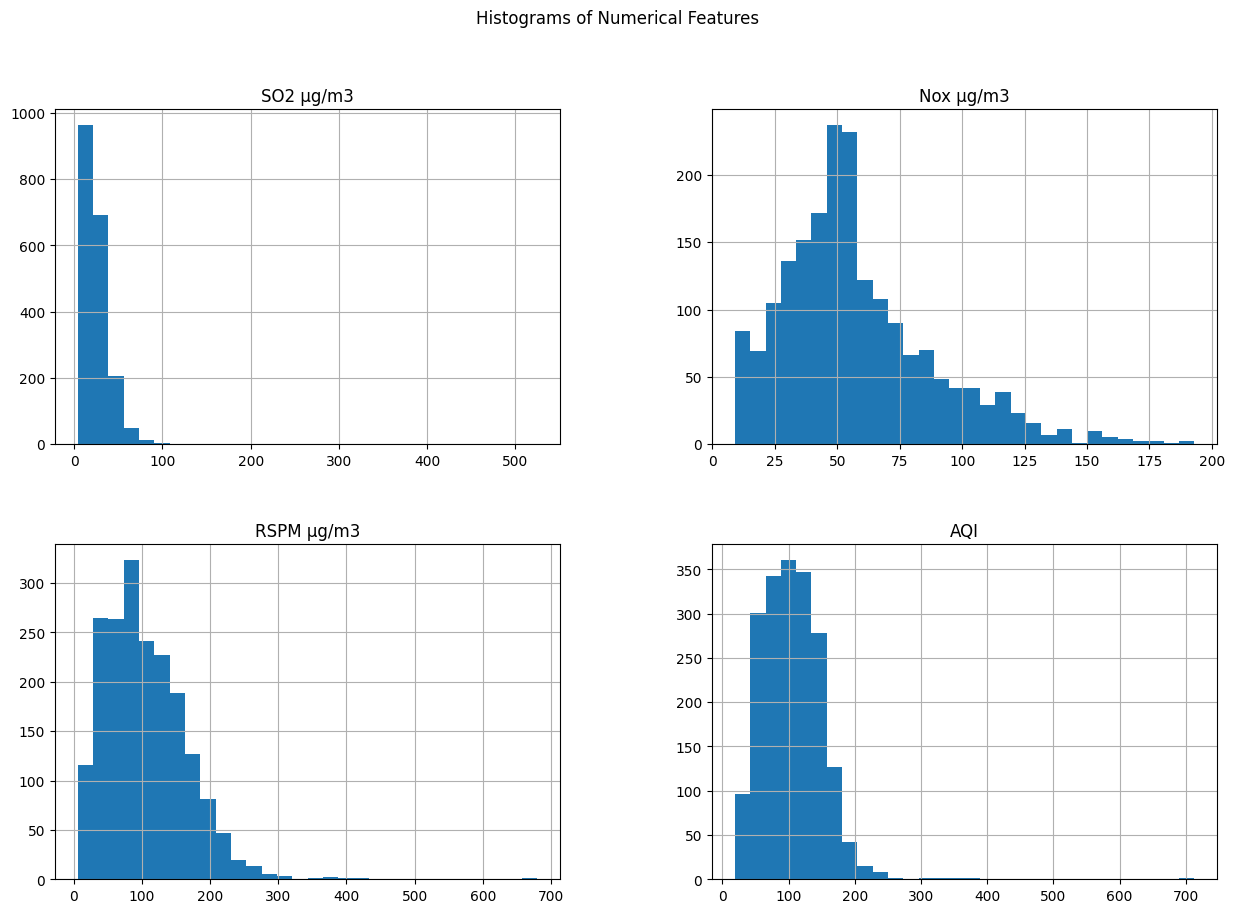

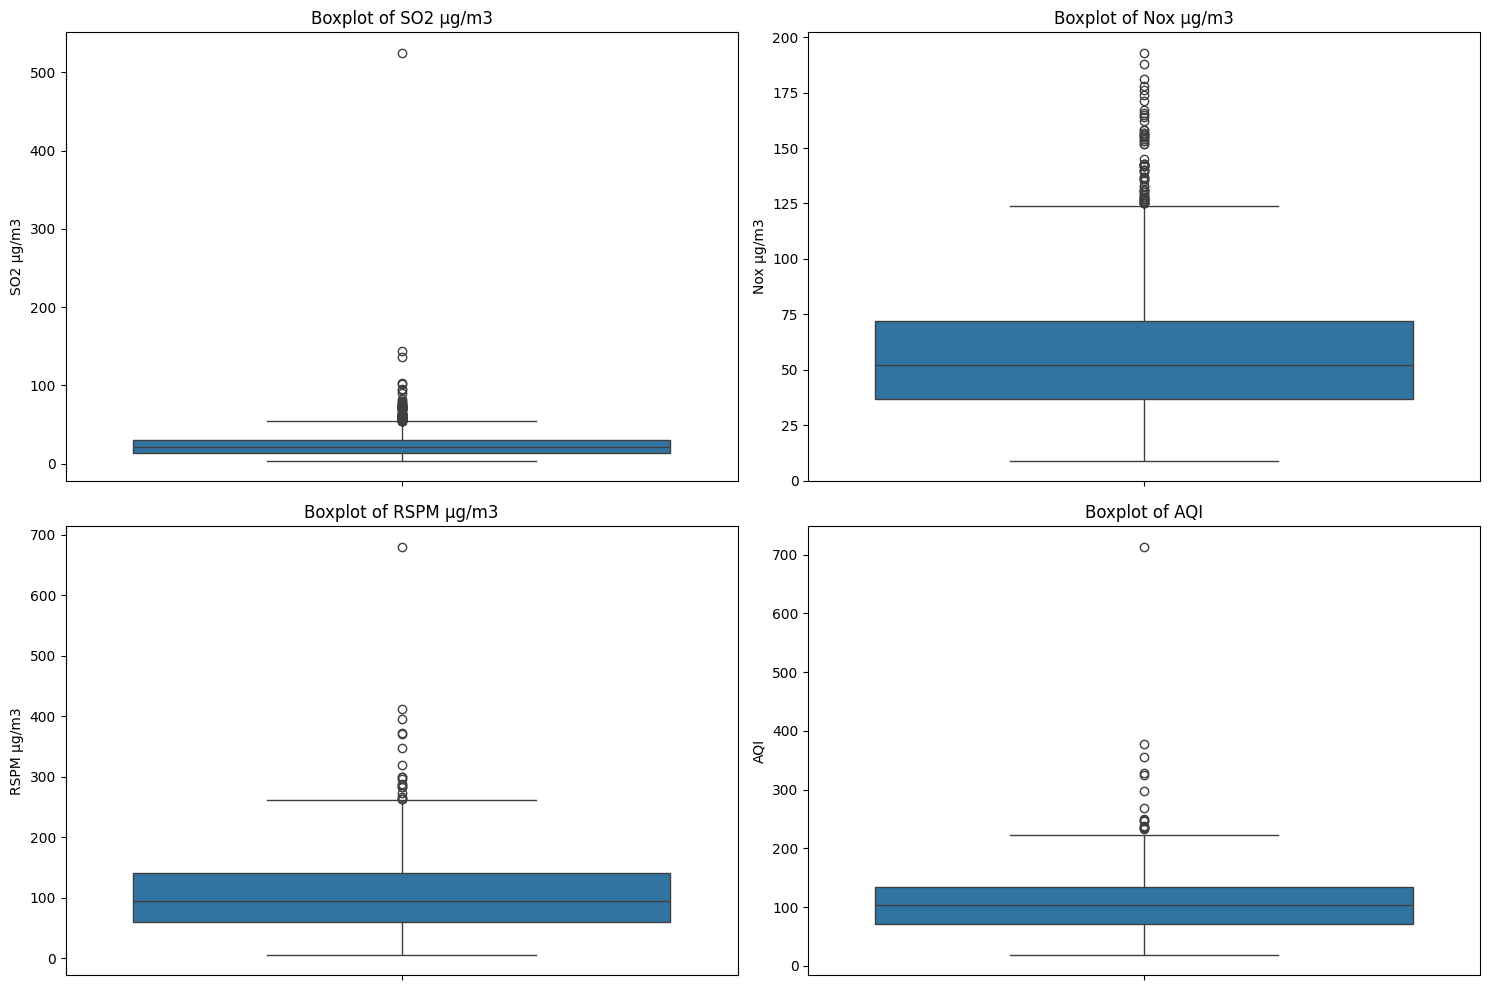

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_cols = ['SO2 µg/m3', 'Nox µg/m3', 'RSPM µg/m3', 'AQI']

# Plot histograms
data[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Plot boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


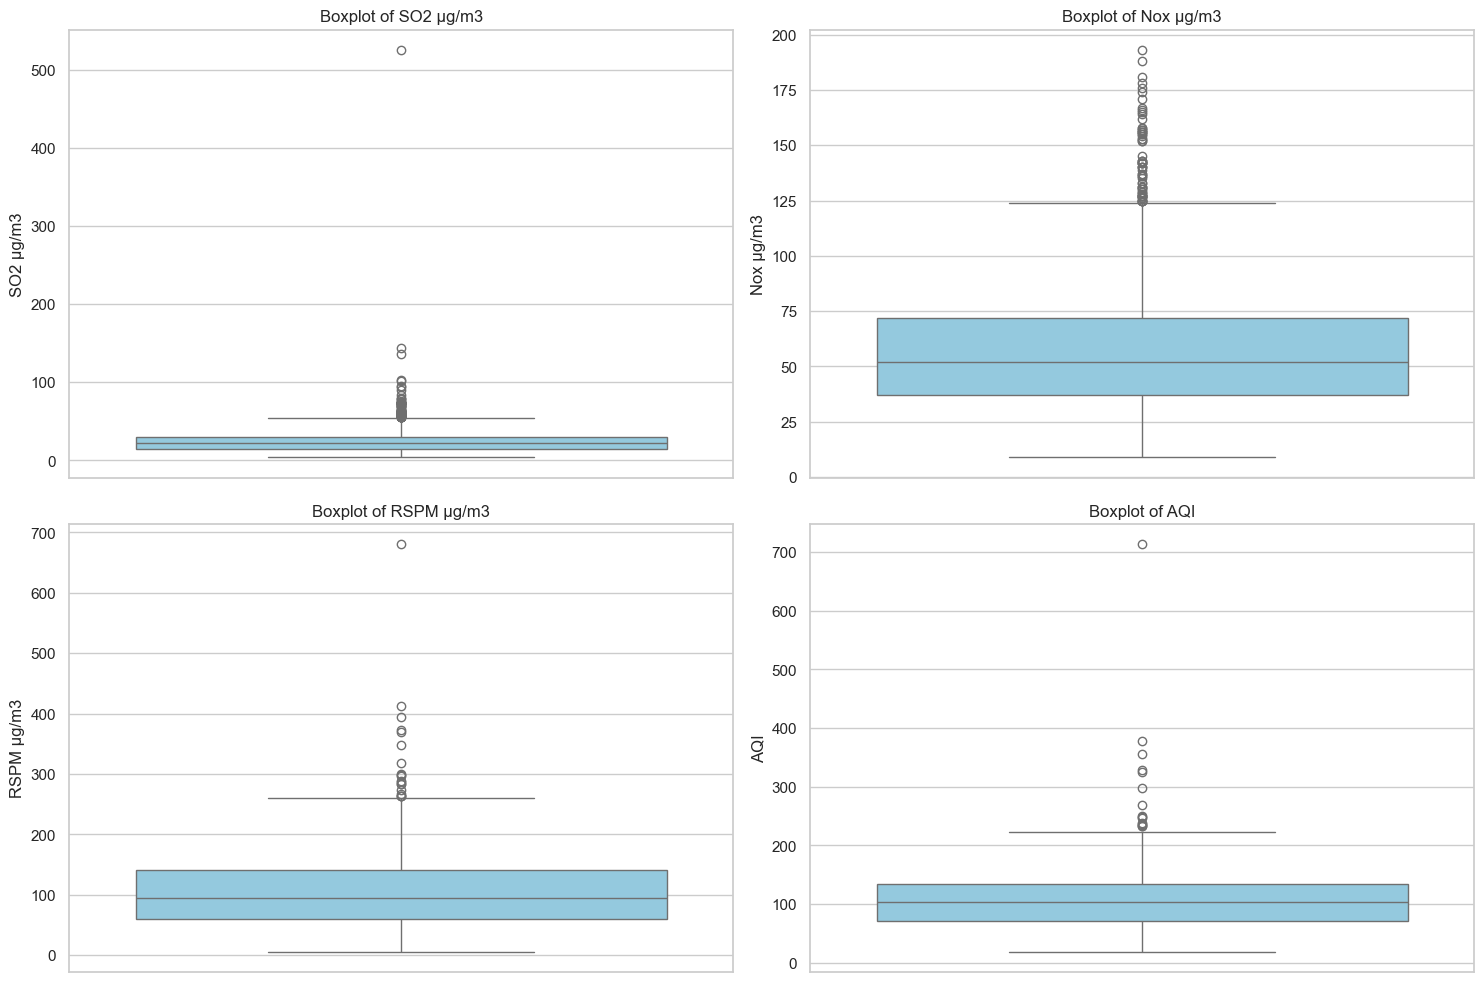

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size and style
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

# List of columns to plot
columns = ['SO2 µg/m3', 'Nox µg/m3', 'RSPM µg/m3', 'AQI']

# Generate boxplots for each numerical feature
for i, col in enumerate(columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=data[col], color='skyblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [173]:
# Calculate Q1 and Q3 for SO2 µg/m3
Q1 = data['SO2 µg/m3'].quantile(0.25)
Q3 = data['SO2 µg/m3'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data = data[(data['SO2 µg/m3'] >= lower_bound) & (data['SO2 µg/m3'] <= upper_bound)]


In [175]:
# Calculate Q1 and Q3 for Nox µg/m3
Q1 = data['Nox µg/m3'].quantile(0.25)
Q3 = data['Nox µg/m3'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data = data[(data['Nox µg/m3'] >= lower_bound) & (data['Nox µg/m3'] <= upper_bound)]


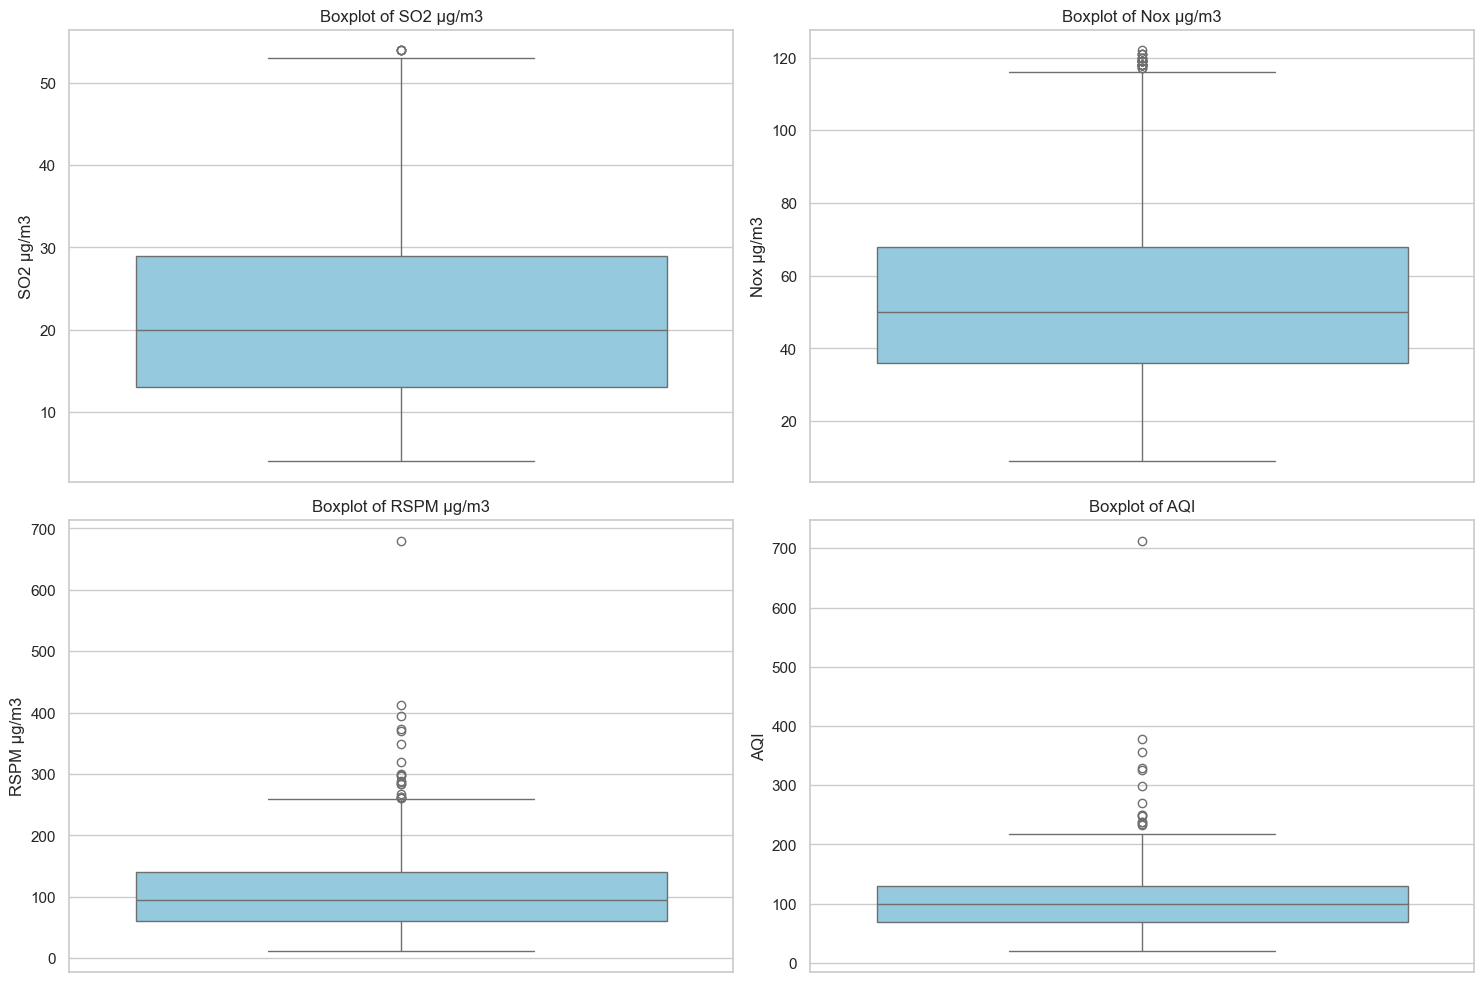

In [177]:
# Calculate Q1 and Q3 for RSPM µg/m3
Q1 = data['RSPM µg/m3'].quantile(0.25)
Q3 = data['RSPM µg/m3'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper boun


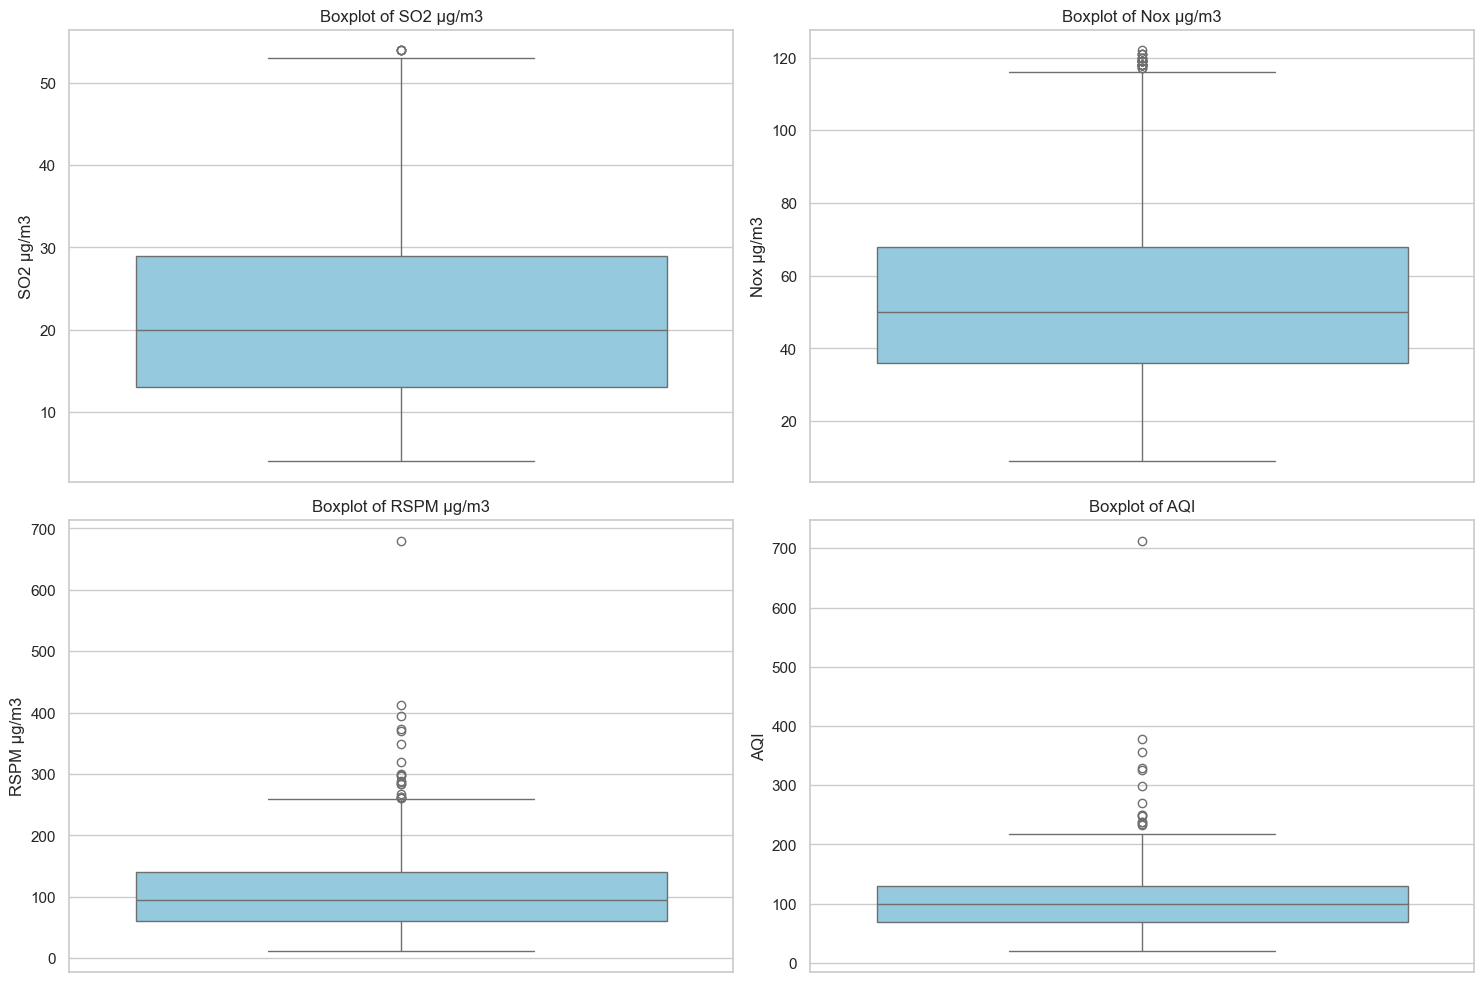

In [179]:
# Calculate Q1 and Q3 for AQI
Q1 = data['AQI'].quantile(0.25)
Q3 = data['AQI'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data = data[(data['AQI'] >= lower_bound) & (data['AQI'] <= upper_bound)]


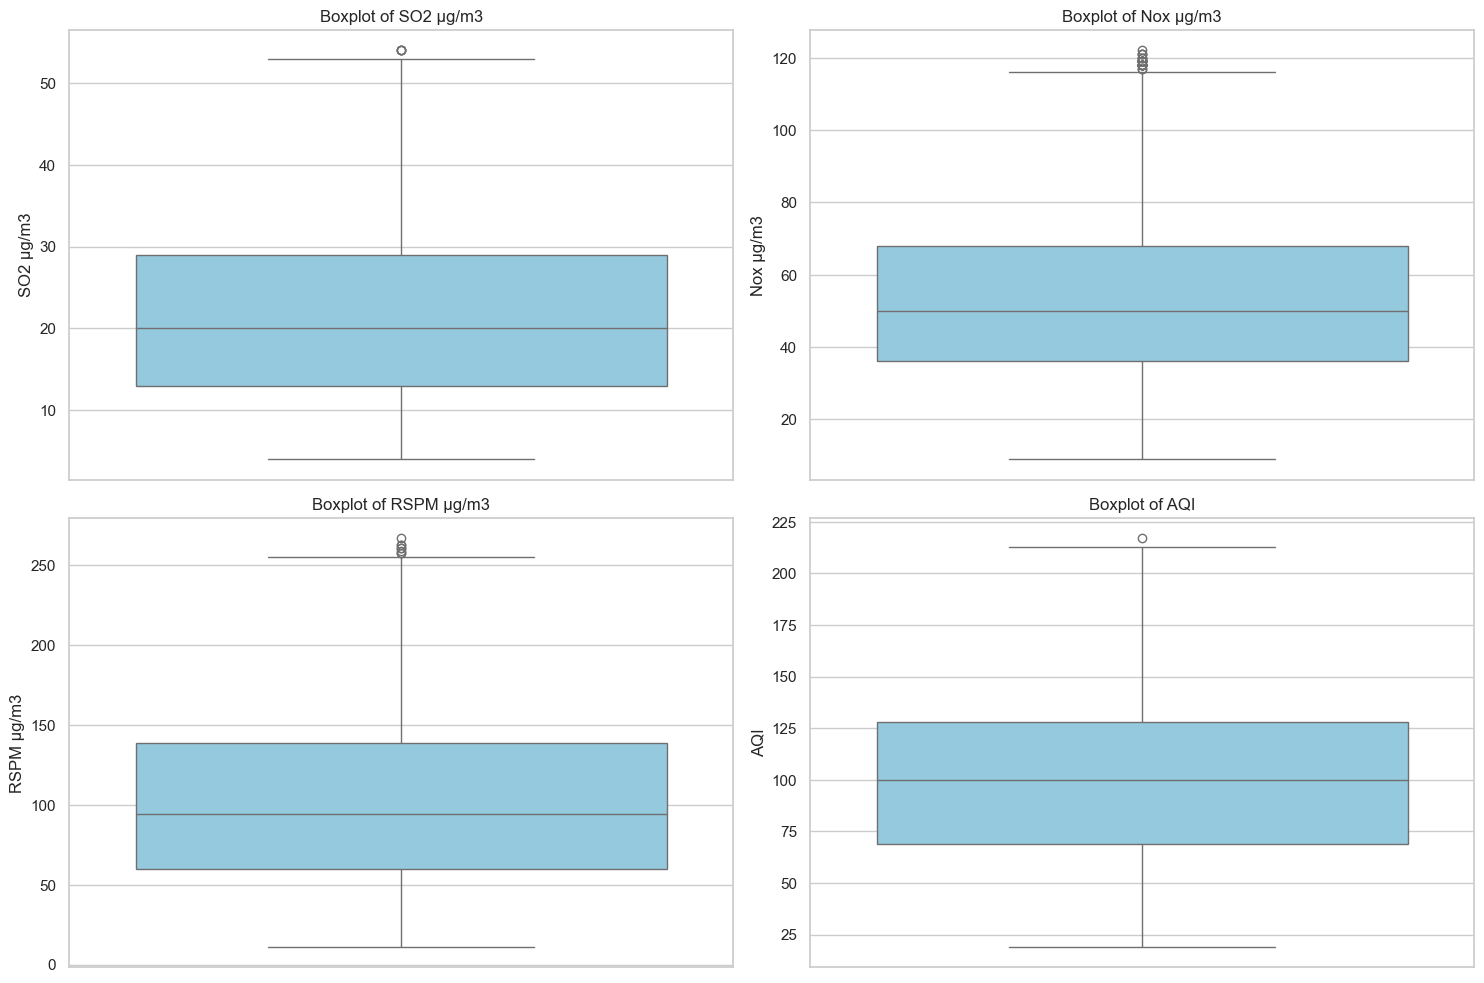

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size and style
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

# List of columns to plot
columns = ['SO2 µg/m3', 'Nox µg/m3', 'RSPM µg/m3', 'AQI']

# Generate boxplots for each numerical feature
for i, col in enumerate(columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=data[col], color='skyblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [182]:
# Features and Target Variable
X = data.drop(columns='AQI')
y = data['AQI']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [183]:
#Linnear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluation Metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print(f"MAE: {mae_lr}")
print(f"MSE: {mse_lr}")
print(f"R² Score: {r2_lr}")


Linear Regression Results:
MAE: 6.720408493999408
MSE: 88.17468738609054
R² Score: 0.9414460687647496


In [184]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation Metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Results:")
print(f"MAE: {mae_rf}")
print(f"MSE: {mse_rf}")
print(f"R² Score: {r2_rf}")



Random Forest Results:
MAE: 0.5433903133903136
MSE: 2.1915666666666667
R² Score: 0.9985446521252117


In [185]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluation Metrics
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting Results:")
print(f"MAE: {mae_gb}")
print(f"MSE: {mse_gb}")
print(f"R² Score: {r2_gb}")



Gradient Boosting Results:
MAE: 1.4889449054100734
MSE: 5.3691038570340295
R² Score: 0.9964345534148241
